In [1]:
# import libraries
import pandas as pd
from pandas import DataFrame, merge
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
# read in the data file
FF1 = pd.read_csv('FoodFuel.csv')

In [3]:
FF1.dtypes

Date                               object
Corn                              float64
Ethanol                           float64
Blender_cost                      float64
Gasoline                          float64
Corn_cost_per_gallon              float64
Ethanol_geg                       float64
Year                                int64
Month                               int64
Alcoholic beverages at home       float64
Beef and veal                     float64
Breakfast cereal                  float64
Cakes, cupcakes, and cookies      float64
Carbonated drinks                 float64
Cereals and cereal products       float64
Dairy and related products        float64
Fats and oils                     float64
Fish and seafood                  float64
Flour and prepared flour mixes    float64
Food                              float64
Frozen vegetables                 float64
Fruits and vegetables             float64
Ham                               float64
Meats                             

In [4]:
# set index to date
FF1.set_index('Date')

,Corn,Ethanol,Blender_cost,Gasoline,Corn_cost_per_gallon,Ethanol_geg,Year,Month,Alcoholic beverages at home,Beef and veal,...,Fats and oils,Fish and seafood,Flour and prepared flour mixes,Food,Frozen vegetables,Fruits and vegetables,Ham,Meats,Poultry,"Rice, pasta, cornmeal"
Date,,,,,,,,,,,,,,,,,,,,,
1982-01-01,2.54,1.75,1.15,1.04,0.940741,2.611940,1982,1,95.000,98.000,...,96.800,98.900,97.800,95.800,93.300,98.100,94.400,96.000,95.300,102.000
1982-02-01,2.44,1.70,1.10,1.01,0.903704,2.537313,1982,2,95.800,98.800,...,96.400,99.000,97.800,96.600,94.000,100.400,94.300,96.900,96.100,102.900
1982-03-01,2.46,1.66,1.06,0.95,0.911111,2.477612,1982,3,96.300,98.900,...,96.100,99.700,97.900,96.400,94.200,97.600,95.800,97.300,95.600,102.100
1982-04-01,2.55,1.70,1.10,0.90,0.944444,2.537313,1982,4,96.700,100.000,...,96.400,101.200,98.200,96.800,95.500,97.900,93.400,98.200,94.900,101.000
1982-05-01,2.60,1.70,1.10,0.94,0.962963,2.537313,1982,5,97.000,102.300,...,96.400,97.000,99.700,97.300,95.500,99.200,97.100,100.400,96.200,101.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01,3.78,1.03,1.03,1.78,0.381481,1.537313,2020,2,207.030,314.232,...,226.890,298.721,234.170,261.876,201.604,299.817,209.558,260.417,232.820,239.446
2020-03-01,3.68,0.84,0.84,1.14,0.311111,1.253731,2020,3,208.219,316.270,...,228.497,297.550,235.939,262.708,201.175,299.641,219.842,261.489,235.803,238.912
2020-04-01,3.29,0.59,0.59,0.63,0.218519,0.880597,2020,4,209.282,329.503,...,230.824,311.987,238.985,266.757,207.732,304.809,210.336,270.149,246.991,244.852


In [5]:
FF1['Date'] = pd.to_datetime(FF1.Date, utc=True)

In [6]:
FF1.dtypes

Date                              datetime64[ns, UTC]
Corn                                          float64
Ethanol                                       float64
Blender_cost                                  float64
Gasoline                                      float64
Corn_cost_per_gallon                          float64
Ethanol_geg                                   float64
Year                                            int64
Month                                           int64
Alcoholic beverages at home                   float64
Beef and veal                                 float64
Breakfast cereal                              float64
Cakes, cupcakes, and cookies                  float64
Carbonated drinks                             float64
Cereals and cereal products                   float64
Dairy and related products                    float64
Fats and oils                                 float64
Fish and seafood                              float64
Flour and prepared flour mix

In [7]:
#examine info
FF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   Date                            462 non-null    datetime64[ns, UTC]
 1   Corn                            461 non-null    float64            
 2   Ethanol                         462 non-null    float64            
 3   Blender_cost                    462 non-null    float64            
 4   Gasoline                        462 non-null    float64            
 5   Corn_cost_per_gallon            462 non-null    float64            
 6   Ethanol_geg                     462 non-null    float64            
 7   Year                            462 non-null    int64              
 8   Month                           462 non-null    int64              
 9   Alcoholic beverages at home     462 non-null    float64            
 10  Beef and veal 

In [8]:
FF1.describe()

,Corn,Ethanol,Blender_cost,Gasoline,Corn_cost_per_gallon,Ethanol_geg,Year,Month,Alcoholic beverages at home,Beef and veal,...,Fats and oils,Fish and seafood,Flour and prepared flour mixes,Food,Frozen vegetables,Fruits and vegetables,Ham,Meats,Poultry,"Rice, pasta, cornmeal"
count,461.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,...,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,3.028091,1.567684,1.142835,1.310152,1.109388,2.339827,2000.753247,6.461039,158.118225,183.909459,...,163.000513,196.953656,173.170491,176.660745,159.554167,210.495290,159.071866,170.560379,169.390455,167.815439
std,1.242822,0.515385,0.612010,0.811615,0.468614,0.769231,11.127916,3.455574,33.758970,72.671277,...,44.833483,61.242186,52.267273,50.817911,35.984652,68.433349,36.479032,53.861898,44.568401,50.930526
min,1.400000,0.590000,0.150000,0.360000,0.218519,0.880597,1982.000000,1.000000,95.000000,95.000000,...,95.500000,96.800000,97.800000,95.800000,93.300000,91.900000,93.400000,96.000000,93.500000,97.800000
25%,2.170000,1.182500,0.650000,0.630000,0.796296,1.764925,1991.000000,3.000000,138.450000,131.900000,...,129.800000,149.425000,127.375000,136.550000,129.775000,153.750000,134.950000,131.100000,133.150000,126.650000
50%,2.600000,1.430000,0.980000,0.940000,0.955556,2.134328,2001.000000,6.000000,160.550000,159.650000,...,153.250000,189.200000,165.100000,171.800000,164.450000,211.650000,157.400000,157.950000,162.450000,153.650000
75%,3.560000,1.720000,1.517500,1.927500,1.317593,2.567164,2010.000000,9.000000,191.295250,229.569750,...,206.842000,247.939000,231.202500,220.616750,196.582250,280.984250,191.971500,211.844750,206.094750,231.166000
max,7.630000,3.580000,3.150000,3.370000,2.825926,5.343284,2020.000000,12.000000,209.557000,385.495000,...,234.392000,313.424000,258.791000,269.770000,212.813000,306.798000,239.559000,298.033000,252.765000,249.304000


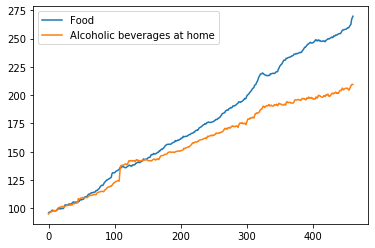

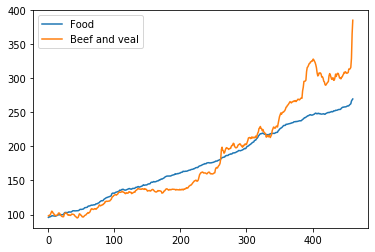

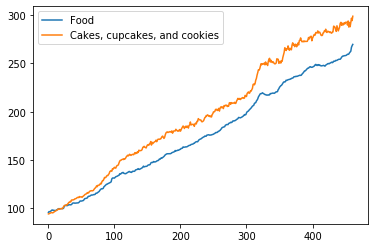

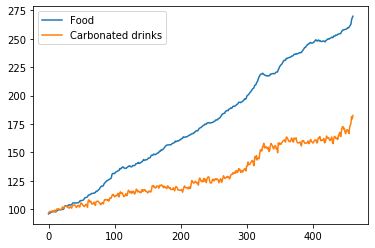

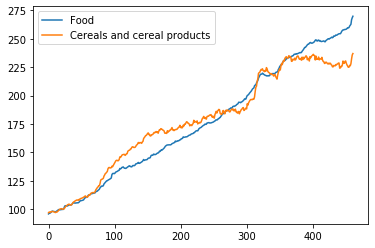

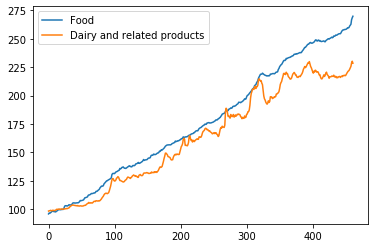

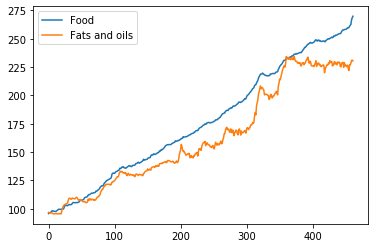

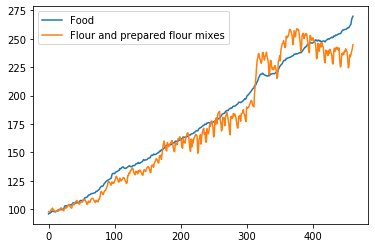

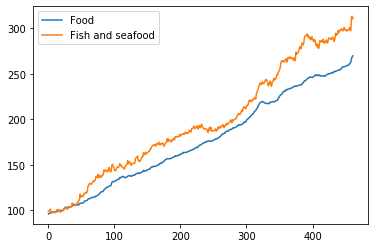

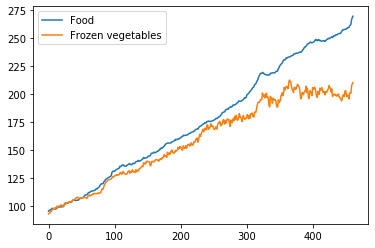

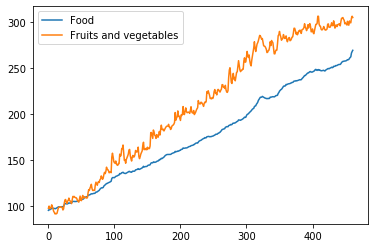

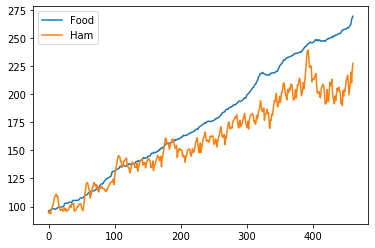

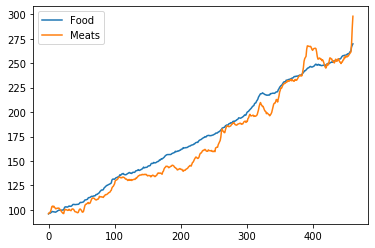

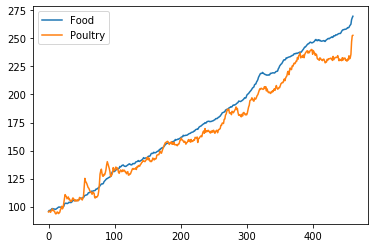

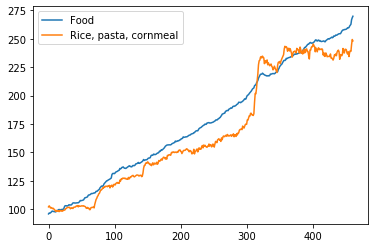

In [9]:
#plot the time series
FF1[['Food','Alcoholic beverages at home']].plot()
FF1[['Food','Beef and veal']].plot()
FF1[['Food','Cakes, cupcakes, and cookies']].plot()
FF1[['Food','Carbonated drinks']].plot()
FF1[['Food','Cereals and cereal products']].plot()
FF1[['Food','Dairy and related products']].plot()
FF1[['Food','Fats and oils']].plot()
FF1[['Food','Flour and prepared flour mixes']].plot()
FF1[['Food','Fish and seafood']].plot()
FF1[['Food','Frozen vegetables']].plot()
FF1[['Food','Fruits and vegetables']].plot()
FF1[['Food','Ham']].plot()
FF1[['Food','Meats']].plot()
FF1[['Food','Poultry']].plot()
FF1[['Food','Rice, pasta, cornmeal']].plot()

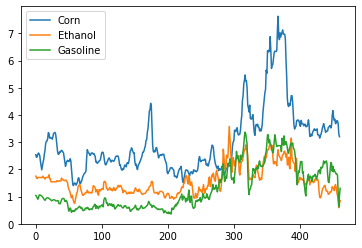

In [10]:
# there is an interesting spike in meat prices that seems more or less in concert with a spike in both corn and fuel prices
FF1[['Corn','Ethanol','Gasoline']].plot()


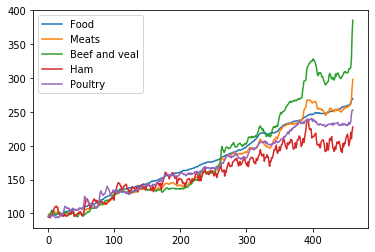

In [11]:
FF1[['Food','Meats','Beef and veal', 'Ham', 'Poultry']].plot()

In [12]:
# get min and max dates for commodities to see the spikes are the same
print(FF1[['Date','Corn']][FF1['Corn']==FF1['Corn'].max()])
print(FF1[['Date','Corn']][FF1['Corn']==FF1['Corn'].min()])

                         Date  Corn
367 2012-08-01 00:00:00+00:00  7.63
                        Date  Corn
57 1986-10-01 00:00:00+00:00   1.4


In [13]:
# get min and max dates for commodities to see the spikes are the same
print(FF1[['Date','Ethanol']][FF1['Ethanol']==FF1['Ethanol'].max()])
print(FF1[['Date','Ethanol']][FF1['Ethanol']==FF1['Ethanol'].min()])

                         Date  Ethanol
293 2006-06-01 00:00:00+00:00     3.58
                         Date  Ethanol
459 2020-04-01 00:00:00+00:00     0.59


In [14]:
# get min and max dates for commodities to see the spikes are the same
print(FF1[['Date','Gasoline']][FF1['Gasoline']==FF1['Gasoline'].max()])
print(FF1[['Date','Gasoline']][FF1['Gasoline']==FF1['Gasoline'].min()])

                         Date  Gasoline
317 2008-06-01 00:00:00+00:00      3.37
                         Date  Gasoline
205 1999-02-01 00:00:00+00:00      0.36


In [15]:
# get min and max dates for commodities to see the spikes are the same
print(FF1[['Date','Meats']][FF1['Meats']==FF1['Meats'].max()])
print(FF1[['Date','Meats']][FF1['Meats']==FF1['Meats'].min()])

                         Date    Meats
461 2020-06-01 00:00:00+00:00  298.033
                       Date  Meats
0 1982-01-01 00:00:00+00:00   96.0


In [16]:
# get min and max dates for commodities to see the spikes are the same
print(FF1[['Date','Beef and veal']][FF1['Beef and veal']==FF1['Beef and veal'].max()])
print(FF1[['Date','Beef and veal']][FF1['Beef and veal']==FF1['Beef and veal'].min()])

                         Date  Beef and veal
461 2020-06-01 00:00:00+00:00        385.495
                        Date  Beef and veal
44 1985-09-01 00:00:00+00:00           95.0


In [17]:
# get min and max dates for commodities to see the spikes are the same
print(FF1[['Date','Ham']][FF1['Ham']==FF1['Ham'].max()])
print(FF1[['Date','Ham']][FF1['Ham']==FF1['Ham'].min()])

                         Date      Ham
393 2014-10-01 00:00:00+00:00  239.559
                       Date   Ham
3 1982-04-01 00:00:00+00:00  93.4


In [18]:
# get min and max dates for commodities to see the spikes are the same
print(FF1[['Date','Poultry']][FF1['Poultry']==FF1['Poultry'].max()])
print(FF1[['Date','Poultry']][FF1['Poultry']==FF1['Poultry'].min()])

                         Date  Poultry
461 2020-06-01 00:00:00+00:00  252.765
                        Date  Poultry
11 1982-12-01 00:00:00+00:00     93.5


In [19]:
FFp = FF1.iloc[:,2:].pct_change()

In [20]:
FFp

,Ethanol,Blender_cost,Gasoline,Corn_cost_per_gallon,Ethanol_geg,Year,Month,Alcoholic beverages at home,Beef and veal,Breakfast cereal,...,Fats and oils,Fish and seafood,Flour and prepared flour mixes,Food,Frozen vegetables,Fruits and vegetables,Ham,Meats,Poultry,"Rice, pasta, cornmeal"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.028571,-0.043478,-0.028846,-0.039370,-0.028571,0.0,1.000000,0.008421,0.008163,0.010741,...,-0.004132,0.001011,0.000000,0.008351,0.007503,0.023445,-0.001059,0.009375,0.008395,0.008824
2,-0.023529,-0.036364,-0.059406,0.008197,-0.023529,0.0,0.500000,0.005219,0.001012,0.002125,...,-0.003112,0.007071,0.001022,-0.002070,0.002128,-0.027888,0.015907,0.004128,-0.005203,-0.007775
3,0.024096,0.037736,-0.052632,0.036585,0.024096,0.0,0.333333,0.004154,0.011122,0.001060,...,0.003122,0.015045,0.003064,0.004149,0.013800,0.003074,-0.025052,0.009250,-0.007322,-0.010774
4,0.000000,0.000000,0.044444,0.019608,0.000000,0.0,0.250000,0.003102,0.023000,0.002119,...,0.000000,-0.041502,0.015275,0.005165,0.000000,0.013279,0.039615,0.022403,0.013699,0.003960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,-0.104348,-0.104348,-0.027322,-0.104348,-0.104348,0.0,1.000000,0.007043,0.001983,-0.007866,...,-0.001026,-0.007050,-0.006538,0.003137,0.002028,-0.006172,0.025516,0.003522,0.004396,0.007210
458,-0.184466,-0.184466,-0.359551,-0.184466,-0.184466,0.0,0.500000,0.005743,0.006486,0.017837,...,0.007083,-0.003920,0.007554,0.003177,-0.002128,-0.000587,0.049075,0.004116,0.012812,-0.002230
459,-0.297619,-0.297619,-0.447368,-0.297619,-0.297619,0.0,0.333333,0.005105,0.041841,0.014740,...,0.010184,0.048520,0.012910,0.015413,0.032594,0.017247,-0.043240,0.033118,0.047446,0.024863
460,0.271186,0.271186,0.682540,0.271186,0.271186,0.0,0.250000,0.001314,0.109198,0.014094,...,0.001061,0.004606,0.007507,0.006305,0.007933,0.006525,0.055026,0.059360,0.021972,0.018182


In [21]:
c = pd.DataFrame(FFp.corr())

In [22]:
c

,Ethanol,Blender_cost,Gasoline,Corn_cost_per_gallon,Ethanol_geg,Year,Month,Alcoholic beverages at home,Beef and veal,Breakfast cereal,...,Fats and oils,Fish and seafood,Flour and prepared flour mixes,Food,Frozen vegetables,Fruits and vegetables,Ham,Meats,Poultry,"Rice, pasta, cornmeal"
Ethanol,1.000000,0.927291,0.381727,0.257928,1.000000,-0.089375,0.101030,0.004768,0.128313,-0.001728,...,0.005236,-0.043385,-0.077500,0.019187,-0.055563,-0.003842,0.011640,0.132594,0.009831,-0.032424
Blender_cost,0.927291,1.000000,0.379676,0.191656,0.927291,-0.000850,0.038325,0.053514,0.110968,-0.002640,...,0.059148,0.021656,-0.038053,0.098725,-0.030237,0.056646,-0.011296,0.127919,0.016110,-0.013083
Gasoline,0.381727,0.379676,1.000000,0.200711,0.381727,0.045476,0.055246,-0.006066,0.164795,0.078114,...,0.012423,-0.011132,0.076850,-0.006821,0.014267,-0.013647,0.067476,0.117957,-0.033699,0.064740
Corn_cost_per_gallon,0.257928,0.191656,0.200711,1.000000,0.257928,0.013473,0.039908,-0.017129,0.097653,0.073803,...,-0.024381,-0.071549,0.033755,0.013796,-0.026606,0.081880,-0.150952,-0.012235,0.006323,0.062681
Ethanol_geg,1.000000,0.927291,0.381727,0.257928,1.000000,-0.089375,0.101030,0.004768,0.128313,-0.001728,...,0.005236,-0.043385,-0.077500,0.019187,-0.055563,-0.003842,0.011640,0.132594,0.009831,-0.032424
Year,-0.089375,-0.000850,0.045476,0.013473,-0.089375,1.000000,-0.798163,0.283559,-0.027553,-0.161406,...,0.364607,0.379377,0.612217,0.432883,0.408319,0.326451,-0.017518,0.000903,0.002449,0.199103
Month,0.101030,0.038325,0.055246,0.039908,0.101030,-0.798163,1.000000,-0.032340,0.095440,0.191858,...,-0.286116,-0.383445,-0.451537,-0.365672,-0.297676,-0.336223,0.008235,0.037601,0.020777,-0.113470
Alcoholic beverages at home,0.004768,0.053514,-0.006066,-0.017129,0.004768,0.283559,-0.032340,1.000000,-0.001731,0.012878,...,0.160509,0.002561,0.145012,0.160836,0.059918,0.093576,0.021107,0.009171,0.025168,0.092190
Beef and veal,0.128313,0.110968,0.164795,0.097653,0.128313,-0.027553,0.095440,-0.001731,1.000000,0.090992,...,-0.007941,0.097396,-0.043130,0.340801,0.004305,0.079029,0.069735,0.830431,0.171594,0.068785
Breakfast cereal,-0.001728,-0.002640,0.078114,0.073803,-0.001728,-0.161406,0.191858,0.012878,0.090992,1.000000,...,-0.089161,0.031629,-0.092842,0.096104,-0.068464,0.067336,-0.120729,0.027682,0.026697,0.045352


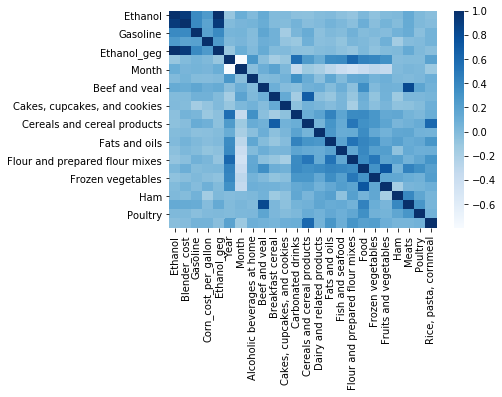

In [23]:
sns.heatmap(c, cmap='Blues')

In [24]:
# it looks like there may be a stronger correlation between 2005-2019 so I will create a new df with 2005 - 2019
FF2 = FF1[FF1.Date.between('2005', '2019-12-01')]

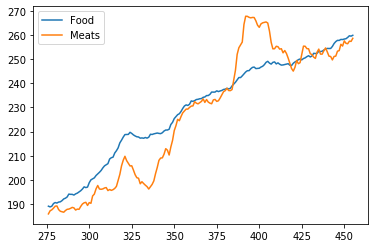

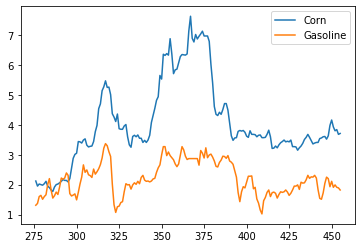

In [25]:
FF2[['Food','Meats']].plot()
FF2[['Corn','Gasoline']].plot()

In [26]:
FF2

,Date,Corn,Ethanol,Blender_cost,Gasoline,Corn_cost_per_gallon,Ethanol_geg,Year,Month,Alcoholic beverages at home,...,Fats and oils,Fish and seafood,Flour and prepared flour mixes,Food,Frozen vegetables,Fruits and vegetables,Ham,Meats,Poultry,"Rice, pasta, cornmeal"
276,2005-01-01 00:00:00+00:00,2.12,1.72,1.21,1.31,0.785185,2.567164,2005,1,171.300,...,170.400,199.400,181.300,189.100,177.000,242.900,170.200,185.900,183.800,165.400
277,2005-02-01 00:00:00+00:00,1.95,1.56,1.05,1.37,0.722222,2.328358,2005,2,172.200,...,169.300,196.900,181.700,188.800,176.300,234.800,170.600,187.200,182.000,164.100
278,2005-03-01 00:00:00+00:00,2.02,1.31,0.80,1.60,0.748148,1.955224,2005,3,172.700,...,167.000,196.200,179.800,189.100,174.700,233.700,170.000,187.600,185.000,165.200
279,2005-04-01 00:00:00+00:00,2.00,1.20,0.69,1.64,0.740741,1.791045,2005,4,172.900,...,169.400,199.400,181.000,190.200,177.200,240.100,175.800,188.300,184.100,164.800
280,2005-05-01 00:00:00+00:00,1.98,1.20,0.69,1.51,0.733333,1.791045,2005,5,172.200,...,167.800,198.600,184.200,190.600,178.600,244.700,176.200,189.100,183.700,166.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2019-08-01 00:00:00+00:00,3.93,1.30,1.30,1.91,1.455556,1.940299,2019,8,206.297,...,225.314,298.622,239.327,258.410,200.210,298.600,212.864,256.510,230.637,240.329
452,2019-09-01 00:00:00+00:00,3.80,1.22,1.22,1.99,1.407407,1.820896,2019,9,205.950,...,226.372,297.023,238.686,258.943,198.000,297.309,214.492,256.336,229.692,237.621
453,2019-10-01 00:00:00+00:00,3.84,1.39,1.39,1.91,1.422222,2.074627,2019,10,206.087,...,226.629,298.194,232.780,259.632,199.043,301.318,217.184,257.392,231.472,236.496
454,2019-11-01 00:00:00+00:00,3.68,1.44,1.44,1.89,1.362963,2.149254,2019,11,205.127,...,223.277,298.291,224.422,259.467,199.326,297.472,210.880,257.298,230.686,238.499


In [27]:
FFp2 = FF2.iloc[:,2:].pct_change()

In [28]:
c2 = FFp2.corr()

In [29]:
c2

,Ethanol,Blender_cost,Gasoline,Corn_cost_per_gallon,Ethanol_geg,Year,Month,Alcoholic beverages at home,Beef and veal,Breakfast cereal,...,Fats and oils,Fish and seafood,Flour and prepared flour mixes,Food,Frozen vegetables,Fruits and vegetables,Ham,Meats,Poultry,"Rice, pasta, cornmeal"
Ethanol,1.000000,0.976015,0.247611,0.251699,1.000000,-0.158091,0.164827,-0.001957,0.006535,0.039353,...,-0.003835,-0.066607,-0.096560,-0.085516,-0.005114,-0.159637,0.010555,0.044134,0.044491,-0.059015
Blender_cost,0.976015,1.000000,0.261973,0.255420,0.976015,-0.094354,0.099552,0.031572,-0.023421,0.014382,...,0.034011,-0.065899,-0.062967,-0.068708,0.014169,-0.150118,0.004513,0.018049,0.050324,-0.043815
Gasoline,0.247611,0.261973,1.000000,0.177450,0.247611,0.004623,0.192400,0.054576,0.105540,0.099230,...,0.018310,-0.029144,0.069685,-0.064066,0.037650,-0.132506,0.146151,0.107634,0.043550,0.078784
Corn_cost_per_gallon,0.251699,0.255420,0.177450,1.000000,0.251699,0.103745,-0.012085,0.048200,-0.005788,0.138966,...,0.082693,-0.014387,0.121598,0.169130,0.099225,0.137713,-0.111220,-0.027035,-0.024208,0.124556
Ethanol_geg,1.000000,0.976015,0.247611,0.251699,1.000000,-0.158091,0.164827,-0.001957,0.006535,0.039353,...,-0.003835,-0.066607,-0.096560,-0.085516,-0.005114,-0.159637,0.010555,0.044134,0.044491,-0.059015
Year,-0.158091,-0.094354,0.004623,0.103745,-0.158091,1.000000,-0.791276,0.401002,-0.082303,-0.299654,...,0.403770,0.219351,0.690516,0.436486,0.390203,0.346122,0.034947,-0.032815,-0.051962,0.205206
Month,0.164827,0.099552,0.192400,-0.012085,0.164827,-0.791276,1.000000,-0.129752,0.227447,0.277099,...,-0.313638,-0.280113,-0.473985,-0.381208,-0.274722,-0.431650,0.037990,0.134903,0.078823,-0.099163
Alcoholic beverages at home,-0.001957,0.031572,0.054576,0.048200,-0.001957,0.401002,-0.129752,1.000000,-0.000909,-0.134425,...,0.349337,-0.020431,0.274509,0.299256,0.037498,0.022869,0.162793,0.077974,0.114620,0.206090
Beef and veal,0.006535,-0.023421,0.105540,-0.005788,0.006535,-0.082303,0.227447,-0.000909,1.000000,0.046362,...,0.018155,0.123911,-0.009442,0.220556,-0.099556,-0.073410,0.134989,0.792250,0.200080,0.042386
Breakfast cereal,0.039353,0.014382,0.099230,0.138966,0.039353,-0.299654,0.277099,-0.134425,0.046362,1.000000,...,-0.160902,-0.082338,-0.147798,-0.104440,-0.145409,-0.141617,-0.160009,-0.050021,-0.011863,0.039310


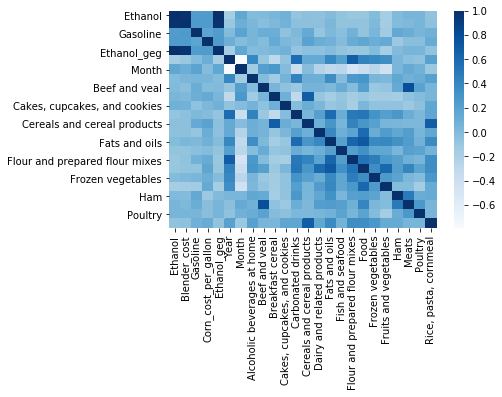

In [30]:
sns.heatmap(c2, cmap='Blues')

In [31]:
FFd2 = FF2.iloc[:,2:].diff()

In [32]:
c3 = FFd2.corr()

In [33]:
c3

,Ethanol,Blender_cost,Gasoline,Corn_cost_per_gallon,Ethanol_geg,Year,Month,Alcoholic beverages at home,Beef and veal,Breakfast cereal,...,Fats and oils,Fish and seafood,Flour and prepared flour mixes,Food,Frozen vegetables,Fruits and vegetables,Ham,Meats,Poultry,"Rice, pasta, cornmeal"
Ethanol,1.000000,0.986356,0.276330,0.257337,1.000000,-0.165410,0.165410,0.002229,0.042971,0.057046,...,-0.038259,-0.076832,-0.114321,-0.092497,-0.043591,-0.169767,-0.014106,0.054520,0.008535,-0.095691
Blender_cost,0.986356,1.000000,0.282766,0.270063,0.986356,-0.119287,0.119287,0.041669,0.048811,0.050651,...,-0.004712,-0.079689,-0.091927,-0.069586,-0.033085,-0.163634,-0.020199,0.053285,0.013484,-0.087870
Gasoline,0.276330,0.282766,1.000000,0.227364,0.276330,0.019531,-0.019531,0.040332,0.109032,0.089916,...,0.047059,-0.051064,0.115864,-0.042589,0.040852,-0.078403,0.126522,0.121983,0.046356,0.082779
Corn_cost_per_gallon,0.257337,0.270063,0.227364,1.000000,0.257337,0.096340,-0.096340,0.036981,0.006157,0.160801,...,0.043693,-0.030468,0.118228,0.128449,0.084022,0.065607,-0.101421,-0.010835,-0.016711,0.070305
Ethanol_geg,1.000000,0.986356,0.276330,0.257337,1.000000,-0.165410,0.165410,0.002229,0.042971,0.057046,...,-0.038259,-0.076832,-0.114321,-0.092497,-0.043591,-0.169767,-0.014106,0.054520,0.008535,-0.095691
Year,-0.165410,-0.119287,0.019531,0.096340,-0.165410,1.000000,-1.000000,0.396344,-0.086734,-0.300209,...,0.402993,0.214669,0.679263,0.444725,0.387203,0.357097,0.033612,-0.041149,-0.046512,0.208144
Month,0.165410,0.119287,-0.019531,-0.096340,0.165410,-1.000000,1.000000,-0.396344,0.086734,0.300209,...,-0.402993,-0.214669,-0.679263,-0.444725,-0.387203,-0.357097,-0.033612,0.041149,0.046512,-0.208144
Alcoholic beverages at home,0.002229,0.041669,0.040332,0.036981,0.002229,0.396344,-0.396344,1.000000,-0.023382,-0.133125,...,0.333938,-0.039264,0.247226,0.288130,0.032492,0.036219,0.163564,0.058142,0.106839,0.200871
Beef and veal,0.042971,0.048811,0.109032,0.006157,0.042971,-0.086734,0.086734,-0.023382,1.000000,0.025575,...,0.025645,0.138236,-0.012880,0.217597,-0.086797,-0.095147,0.160841,0.802018,0.200008,0.033884
Breakfast cereal,0.057046,0.050651,0.089916,0.160801,0.057046,-0.300209,0.300209,-0.133125,0.025575,1.000000,...,-0.138166,-0.078140,-0.134708,-0.097372,-0.139503,-0.128823,-0.149298,-0.043765,-0.013814,0.042844


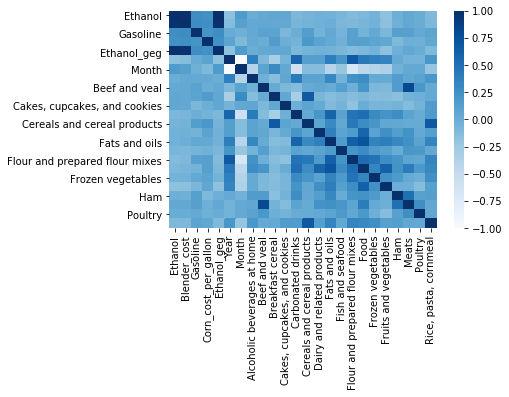

In [34]:
sns.heatmap(c3, cmap='Blues')